Kaggle Link:\
https://www.kaggle.com/competitions/GiveMeSomeCredit/overview/description

In [67]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [68]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Give Me Some Credit/cs-training.csv.zip' -d './train'
!unzip '/content/drive/MyDrive/Colab Notebooks/Give Me Some Credit/cs-test.csv.zip' -d './test'

Archive:  /content/drive/MyDrive/Colab Notebooks/Give Me Some Credit/cs-training.csv.zip
replace ./train/cs-training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/Colab Notebooks/Give Me Some Credit/cs-test.csv.zip
replace ./test/cs-test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [69]:
data = pd.read_csv('/content/train/cs-training.csv')

# Feature Engineering

In [70]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [71]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [74]:
data.shape

(150000, 11)

In [75]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## Missing Value Treatment

In [76]:
print(data['SeriousDlqin2yrs'].value_counts())

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


In [77]:
data0 = data.loc[data['SeriousDlqin2yrs'] == 0]
data0.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [78]:
data1 = data.loc[data['SeriousDlqin2yrs'] == 1]
data1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
13,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
21,1,0.025656,38,0,0.475841,3000.0,7,0,1,0,2.0
25,1,0.392248,50,0,1.595253,4676.0,14,0,3,0,1.0
51,1,0.728150,31,0,0.824725,3000.0,10,0,2,0,1.0


In [79]:
data_mean = data.groupby(['SeriousDlqin2yrs'])['MonthlyIncome']
mean = data_mean.agg(pd.Series.mean)
mean

SeriousDlqin2yrs
0    6747.837774
1    5630.826493
Name: MonthlyIncome, dtype: float64

In [80]:
data0['MonthlyIncome'].fillna(data0['MonthlyIncome'].mean(), inplace = True)
data1['MonthlyIncome'].fillna(data1['MonthlyIncome'].mean(), inplace = True)

In [81]:
data_mode = data.groupby(['SeriousDlqin2yrs'])['NumberOfDependents']
mode = data_mode.agg(pd.Series.mode)
mode

SeriousDlqin2yrs
0    0.0
1    0.0
Name: NumberOfDependents, dtype: float64

In [82]:
import statistics

In [83]:
data0['NumberOfDependents'].fillna(statistics.mode(data0['NumberOfDependents']), inplace = True)
data1['NumberOfDependents'].fillna(statistics.mode(data1['NumberOfDependents']), inplace = True)

In [84]:
data = pd.concat([data0, data1])
data = pd.DataFrame(data)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [85]:
data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [86]:
data.shape

(150000, 11)

## Duplicated Data Treatment

In [87]:
print('Duplicated Data :', data.duplicated().sum())

Duplicated Data : 767


In [88]:
data = data.drop_duplicates()
print('Duplicated Data :', data.duplicated().sum())

Duplicated Data : 0


## Data Cleaning

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149233 entries, 1 to 149979
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149233 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149233 non-null  float64
 2   age                                   149233 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149233 non-null  int64  
 4   DebtRatio                             149233 non-null  float64
 5   MonthlyIncome                         149233 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149233 non-null  int64  
 7   NumberOfTimes90DaysLate               149233 non-null  int64  
 8   NumberRealEstateLoansOrLines          149233 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149233 non-null  int64  
 10  NumberOfDependents                    149233 non-null  float64
dtype

In [90]:
data['NumberOfDependents'] = data['NumberOfDependents'].astype(int)

In [91]:
data['NumberOfDependents'].info()

<class 'pandas.core.series.Series'>
Int64Index: 149233 entries, 1 to 149979
Series name: NumberOfDependents
Non-Null Count   Dtype
--------------   -----
149233 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


<function matplotlib.pyplot.show(close=None, block=None)>

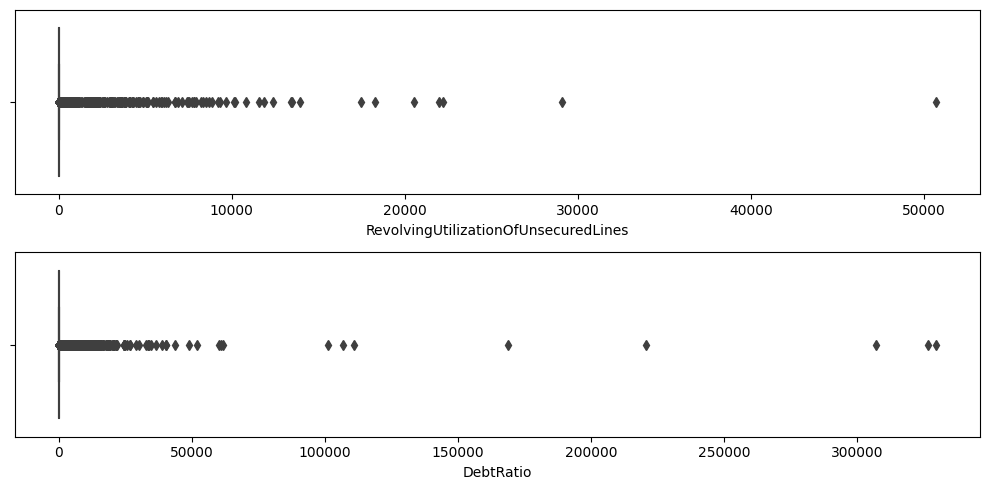

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

check = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']

num_rows = len(check)
fig, axes = plt.subplots(nrows = num_rows, ncols = 1, figsize = (10,5))

for i, col in enumerate(check):
  sns.boxplot(data = data, x = col, ax = axes[i])

plt.tight_layout()
plt.show

In [93]:
for a in ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']:
  Q1 = data[a].quantile(0.25)
  Q3 = data[a].quantile(0.75)

  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  data = data[(data[a]<upper)]
  data = data[(data[a]>lower)]

In [94]:
check2 = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
data2 = data.drop(columns=check2)
for i, j in enumerate(data2.columns):
  print("Column :", j)
  print(dict(data[j].value_counts().sort_index(ascending =True)))
  print("\n")

Column : SeriousDlqin2yrs
{0: 109316, 1: 8061}


Column : age
{0: 1, 21: 118, 22: 277, 23: 479, 24: 622, 25: 767, 26: 959, 27: 1087, 28: 1297, 29: 1405, 30: 1640, 31: 1736, 32: 1767, 33: 1891, 34: 1815, 35: 1858, 36: 1995, 37: 2092, 38: 2190, 39: 2478, 40: 2547, 41: 2569, 42: 2548, 43: 2657, 44: 2753, 45: 2866, 46: 3017, 47: 3037, 48: 3071, 49: 3147, 50: 3037, 51: 2931, 52: 2876, 53: 2905, 54: 2836, 55: 2682, 56: 2793, 57: 2640, 58: 2658, 59: 2509, 60: 2453, 61: 2641, 62: 2659, 63: 2735, 64: 2217, 65: 1882, 66: 1847, 67: 1808, 68: 1595, 69: 1415, 70: 1253, 71: 1188, 72: 1200, 73: 1077, 74: 1048, 75: 849, 76: 837, 77: 778, 78: 739, 79: 703, 80: 624, 81: 537, 82: 456, 83: 333, 84: 312, 85: 316, 86: 274, 87: 225, 88: 200, 89: 188, 90: 128, 91: 98, 92: 61, 93: 56, 94: 26, 95: 27, 96: 10, 97: 12, 98: 6, 99: 5, 101: 2, 102: 3, 103: 1}


Column : NumberOfTime30-59DaysPastDueNotWorse
{0: 97758, 1: 13106, 2: 3788, 3: 1454, 4: 608, 5: 273, 6: 117, 7: 45, 8: 22, 9: 10, 10: 3, 11: 1, 12: 2, 13: 1,

In [95]:
a = 21
data = data[(data['age'] >= a)]

# b = 74
# data = data[(data['age'] <= b)]

In [96]:
# a = 0
# data = data[(data['NumberOfTime30-59DaysPastDueNotWorse'] >= a)]

b = 13
data = data[(data['NumberOfTime30-59DaysPastDueNotWorse'] <= b)]

In [97]:
# a = 0
# data = data[(data['NumberOfTimes90DaysLate'] >= a)]

b = 17
data = data[(data['NumberOfTime60-89DaysPastDueNotWorse'] <= b)]

In [98]:
# a = 0
# data = data[(data['NumberOfTime60-89DaysPastDueNotWorse'] >= a)]

b = 11
data = data[(data['NumberOfTime60-89DaysPastDueNotWorse'] <= b)]

In [99]:
# a = 0
# data = data[(data['NumberOfDependents'] >= a)]

b = 10
data = data[(data['NumberOfDependents'] <= b)]

## Feature Selection


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data.corr()['SeriousDlqin2yrs'].sort_values(ascending=True)

age                                    -0.104001
NumberOfOpenCreditLinesAndLoans        -0.024851
MonthlyIncome                          -0.019777
NumberRealEstateLoansOrLines           -0.004540
NumberOfDependents                      0.048073
DebtRatio                               0.075645
NumberOfTime60-89DaysPastDueNotWorse    0.258547
RevolvingUtilizationOfUnsecuredLines    0.268240
NumberOfTime30-59DaysPastDueNotWorse    0.269627
NumberOfTimes90DaysLate                 0.305347
SeriousDlqin2yrs                        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [102]:
# num_rows = len(data.columns)
# fig, axes = plt.subplots(nrows = num_rows, ncols = 1, figsize = (5,20))

# for i, col in enumerate(data.columns):
#   sns.regplot(x=col, y="SeriousDlqin2yrs", data=data, ax = axes[i])

# plt.tight_layout()
# plt.show

In [103]:
data = data.drop(['NumberRealEstateLoansOrLines', 'NumberOfDependents', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'DebtRatio'], axis=True)

# Split Data


In [104]:
x = data.drop(['SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

In [105]:
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
1,0.957151,40,0,0,0
2,0.658180,38,1,1,0
3,0.233810,30,0,0,0
4,0.907239,49,1,0,0
5,0.213179,74,0,0,0


In [106]:
y.head()

1    0
2    0
3    0
4    0
5    0
Name: SeriousDlqin2yrs, dtype: int64

In [107]:
y.shape

(117185,)

In [108]:
x.shape

(117185, 5)

In [109]:
from sklearn.model_selection import train_test_split as tts
xt, xte, yt, yte = tts(x, y, test_size=0.2, random_state = 42)

# Over Sampling

In [110]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [111]:
print(yt.value_counts())

0    87304
1     6444
Name: SeriousDlqin2yrs, dtype: int64


In [112]:
# over = RandomOverSampler()
# xt2, yt2 = over.fit_resample(xt, yt)

# print(yt2.value_counts())

In [113]:
oversample = SMOTE(sampling_strategy = 'auto')
xt2, yt2 = oversample.fit_resample(xt,yt)

print(yt2.value_counts())

0    87304
1    87304
Name: SeriousDlqin2yrs, dtype: int64


# Model

In [114]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, accuracy_score, recall_score, roc_auc_score,precision_score, f1_score

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [116]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [117]:
def plot_roc(y_test,prob):
    from sklearn.metrics import auc

    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = auc(fpr,tpr)

    plt.figure(1)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr,tpr,'r',label= 'AUC= {:.2f}'.format(auc))
    plt.legend(loc='lower right')
    plt.plot(fpr,tpr, marker='.')
    plt.title("ROC Curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

    print('AUC Score: ', auc)

In [118]:
model = [
    LogisticRegression(random_state= 42, max_iter=10000),
    XGBClassifier(gamma=0),
    RandomForestClassifier(random_state= 42)
]

> LogisticRegression <
Training Score 		: 0.76
Test Score 		: 0.79

classification report :
              precision    recall  f1-score   support

           0       0.79      0.98      0.87     17736
           1       0.74      0.20      0.31      5701

    accuracy                           0.79     23437
   macro avg       0.77      0.59      0.59     23437
weighted avg       0.78      0.79      0.74     23437
 



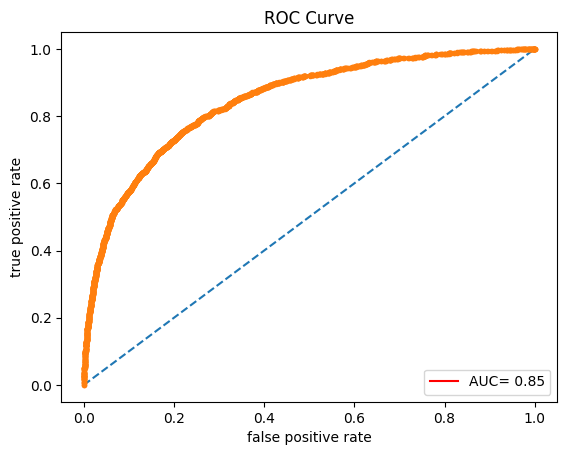

AUC Score:  0.8466293941844882


> XGBClassifier <
Training Score 		: 0.79
Test Score 		: 0.79

classification report :
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     17893
           1       0.71      0.19      0.30      5544

    accuracy                           0.79     23437
   macro avg       0.75      0.58      0.59     23437
weighted avg       0.78      0.79      0.74     23437
 



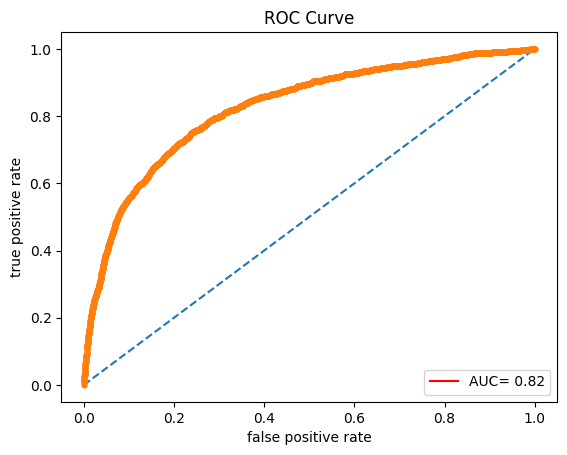

AUC Score:  0.8248625883587489


> RandomForestClassifier <
Training Score 		: 0.98
Test Score 		: 0.73

classification report :
              precision    recall  f1-score   support

           0       0.74      0.96      0.83     16735
           1       0.60      0.13      0.22      6702

    accuracy                           0.73     23437
   macro avg       0.67      0.55      0.53     23437
weighted avg       0.70      0.73      0.66     23437
 



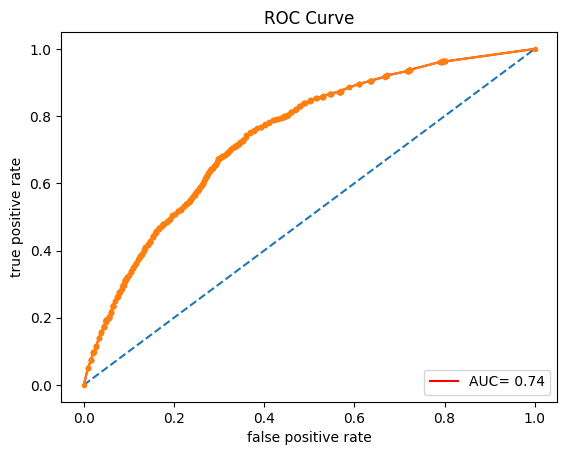

AUC Score:  0.7415130667010403




In [119]:
i = 0
for alg in model:
  model_name = alg.__class__.__name__
  print(">", model_name, "<")
  params = {}

  alg.fit(xt2, yt2)
  predict = alg.predict(xte)

  print("Training Score \t\t:", round(alg.score(xt2, yt2), 2))
  print("Test Score \t\t:", round(alg.score(xte, yte), 2))
  print("\nclassification report :")
  print(classification_report(predict, yte), "\n")

  predict_proba = alg.predict_proba(xte)[:,1]
  plot_roc(yte, predict_proba)
  print("\n")

In [120]:
# for alg in model:
#   model_name = alg.__class__.__name__
#   train_sizes, train_scores, val_scores = learning_curve(alg, xt2, yt2, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

#   # Plot learning curves
#   plt.figure(figsize=(20, 10))

#   plt.subplot(3, 3, 1 + i)
#   plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
#   plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
#   plt.xlabel('Training Set Size')
#   plt.ylabel('Accuracy')
#   plt.title(model_name)
#   plt.legend()
#   i += 1
# plt.show()

# Prediction

In [121]:
test = pd.read_csv('/content/test/cs-test.csv')

In [122]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [123]:
test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [124]:
test['MonthlyIncome'].fillna(test['MonthlyIncome'].mean(), inplace = True)
test['NumberOfDependents'].fillna(0.0, inplace = True)

In [125]:
test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [126]:
pred = test.drop(['Unnamed: 0', 'SeriousDlqin2yrs', 'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'DebtRatio'], axis=1)

In [127]:
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(xt2, yt2)

predict2 = xgb_model.predict_proba(pred)

In [128]:
print(predict2)

[[0.49916893 0.50083107]
 [0.724366   0.275634  ]
 [0.8629763  0.13702367]
 ...
 [0.90054065 0.09945937]
 [0.33171642 0.6682836 ]
 [0.6751447  0.3248553 ]]


In [129]:
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(xt2, yt2)

predict3 = model.predict_proba(pred)

In [130]:
print(predict3)

[[0.40579672 0.59420328]
 [0.66465047 0.33534953]
 [0.82895991 0.17104009]
 ...
 [0.83916903 0.16083097]
 [0.5470323  0.4529677 ]
 [0.58402406 0.41597594]]


# Submission

In [131]:
submit1 = pd.DataFrame({'Id': test['Unnamed: 0'], 'Probability': predict3[:,1]})
submit1.index = submit1['Id']
submit1.drop('Id', axis = 1, inplace=True)
submit1.head()

,Probability
Id,
1,0.594203
2,0.335350
3,0.171040
4,0.452086
5,0.698426


In [132]:
submit1.to_csv('sub.csv')